week3

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving hotel-bill1 (1).csv to hotel-bill1 (1).csv


In [ ]:
def kernel(point, xmat, k):
  m,n = np.shape(xmat)
  weights = np.mat(np.eye((m)))
  for j in range(m):
    diff = point - X[j]
    weights[j,j] = np.exp(diff*diff.T/(-2.0*k**2))
  return weights

In [ ]:
def localWeight(point, xmat, ymat, k):
  wei = kernel(point,xmat,k)
  W = (X.T*(wei*X)).I*(X.T*(wei*ymat.T))
  print("W",W)
  return W

In [ ]:
def localWeightReggression(xmat,ymat,k):
  m,n = np.shape(xmat)
  ypred = np.zeros(m)
  for i in range(m):
    ypred[i] = xmat[i]*localWeight(xmat[i],xmat,ymat,k)
  return ypred

In [ ]:
data = pd.read_csv('hotel-bill1 (1).csv')
bill = np.array(data.total_bill)
tip = np.array(data.tip)

In [ ]:
mbill = np.mat(bill)
print("MBILL",mbill)
mtip = np.mat(tip)
print("Mtip",mtip)

MBILL [[16.99 10.34 21.01 23.68 24.59 25.29  8.77 26.88 15.04 14.78]]
Mtip [[1.01 1.66 3.5  3.31 3.61 4.71 2.   3.12 1.96 3.23]]


In [ ]:
m= np.shape(mbill)[1]
one = np.mat(np.ones(m))
X = np.hstack((one.T,mbill.T))
print("X",X)

X [[ 1.   16.99]
 [ 1.   10.34]
 [ 1.   21.01]
 [ 1.   23.68]
 [ 1.   24.59]
 [ 1.   25.29]
 [ 1.    8.77]
 [ 1.   26.88]
 [ 1.   15.04]
 [ 1.   14.78]]


In [ ]:
ypred=localWeightReggression(X,mtip,2)
SortIndex=X[:,1].argsort(0)
xsort=X[SortIndex][:,0]

W [[ 3.7820118 ]
 [-0.11398397]]
W [[1.12006408]
 [0.07443303]]
W [[-1.59098057]
 [ 0.22541634]]
W [[0.94421405]
 [0.1139078 ]]
W [[2.08025118]
 [0.06752141]]
W [[ 3.78062295e+00]
 [-9.40057667e-04]]
W [[ 2.72095661]
 [-0.09018066]]
W [[ 8.76899261]
 [-0.1982325 ]]
W [[ 7.29652671]
 [-0.33274889]]
W [[ 6.31220778]
 [-0.26814809]]


<ipython-input-3-8999e1cbfa66>:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  weights[j,j] = np.exp(diff*diff.T/(-2.0*k**2))
<ipython-input-5-e9e1f4d977e2>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ypred[i] = xmat[i]*localWeight(xmat[i],xmat,ymat,k)


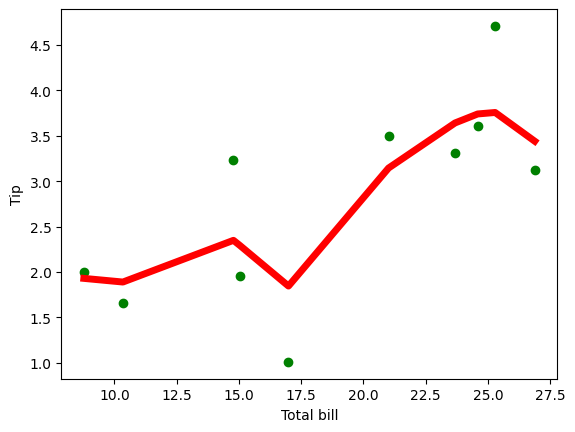

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(bill,tip,color='green')
ax.plot(xsort[:,1],ypred[SortIndex],color = 'red',linewidth = 5)
plt.xlabel('Total bill')
plt.ylabel('Tip')
plt.show()